## 10)

### 10.1) 

У нас есть следующая задача:

$$
\begin{cases}
y''(x) = a^2 y(x) \\
y(0) = 1 \\
y'(0) = -a \\
\end{cases}
$$

Перепишем в виде системы уравнений первого порядка:

$$
\begin{cases}
y_1'(x) = y_2(x) \\
y_2(x)' = a^2y_1(x) \\ 
\end{cases}
$$

При этом

$$
\begin{cases}
y(0) = 1 \\
y'(0) = -a \\
\end{cases}
$$

### 10.2)

Нужно применить метод Эйлера.

Для этого будем деалть следующее:

$$
\begin{cases}
    y_{1, i + 1} = y_{1, i} + h y_{2, i} \\
    y_{2, i + 1} = y_{2, i} + h a^2 y_{1, i} \\
\end{cases}
$$

In [98]:
def get_solution_euler_method(T, N, a, ys):
    y_1, y_2 = ys
    h = T / N
    result_ys = [y_1]
    for _ in range(N):
        y_1_new, y_2_new = y_1 + h * y_2, y_2 + h * a ** 2 * y_1
        y_1, y_2 = y_1_new, y_2_new
        result_ys.append(y_1)
    return result_ys

In [131]:
import matplotlib.pyplot as plt

def build_plot(xs, ys, xlabel='', ylabel='', title='', filename='plot', 
               plot_labels=None):
    plt.clf()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    for ind, (x, y) in enumerate(zip(xs, ys)):
        if plot_labels is not None:
            plt.plot(x, y, label=plot_labels[ind])
        else:
            plt.plot(x, y)
    if plot_labels is not None:
        plt.legend()
    plt.show()

In [132]:
import numpy as np

def get_ts_and_as():
    return [10], [1, np.sqrt(20)]

Для начала, рассмотрим несколько совмещенных графиков для разных $N$.

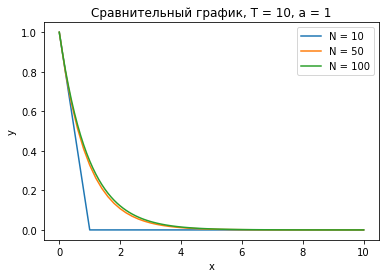

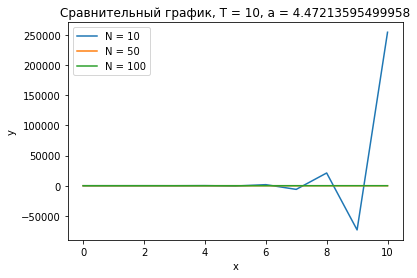

In [135]:
ns = [10, 50, 100]

t, a = get_ts_and_as()

for av in a:
    for tv in t:
        build_plot(([[i * tv / N for i in range(N + 1)] for N in ns]), 
                   ([get_solution_euler_method(tv, N, av, (1, -av)) for N in ns]),
                   'x',
                   'y',
                   'Сравнительный график, T = {t}, a = {a}'.format(t=tv, a=av),
                    plot_labels=['N = {N}'.format(N=N) for N in ns])

Рассмотрим полученные графики с точки зрения того, что $y = e^{-ax}$ (которое, очевидно, является решением системы). Построим графики $\log$ приближенного решения (для первого случая, когда нет отрицательных значений), чтобы просто проверить, что мы примерно правы.

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


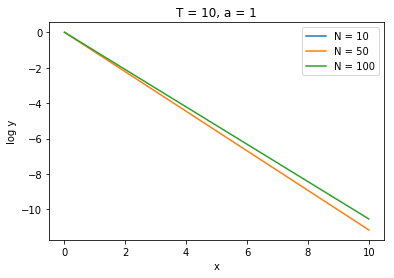

In [149]:
ns = [10, 50, 100]

t, a = get_ts_and_as()

for av in a[:1]:
    for tv in t:
        build_plot(([[i * tv / N for i in range(N + 1)] for N in ns]), 
                   ([np.log(get_solution_euler_method(tv, N, av, (1, -av))) for N in ns]),
                   'x',
                   'log y',
                   'T = {t}, a = {a}'.format(t=tv, a=av),
                    plot_labels=['N = {N}'.format(N=N) for N in ns])

Графики действительно обратно экспоненциональные (логирифм является прямой). А при $N = 10$ логарифм не построился, потому что мы сразу же улетаем в ноль (если посмотреть на численные значения, там ноль и будет). Также, видим какой-то ад} при малых значениях (в нашем случае, $N = 10$) на первых двух графиков. Мне кажется, что интервалов просто мало.

### 10.3)

Как уже было замечено, точное решение системы - это $e^{-ax}$ (Не буду расписывать как в прошлый раз, потому что ничего хитрого нет. Ищем в виде $c_1 e^{-ax} + c_2 e^{ax}$, из условий находим $c_1 = 1, c_2 = 0$)

In [147]:
import numpy as np

def get_u(a, x):
    return np.exp(-a * x)

In [164]:
def get_solution_euler_method_diff(T, N, a, ys):
    y_1, y_2 = ys
    h = T / N
    result_ys = [y_1]
    for _ in range(N):
        y_1_new, y_2_new = y_1 + h * y_2, y_2 + h * a ** 2 * y_1
        y_1, y_2 = y_1_new, y_2_new
        result_ys.append(y_1)
    return [np.abs(y - get_u(a, ind * h)) for ind, y in enumerate(result_ys)]

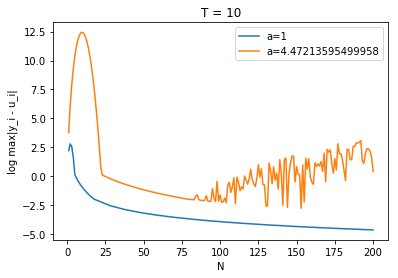

In [168]:
ns = range(1, 201)

t, a = get_ts_and_as()

build_plot(([ns for _ in a]), 
           ([np.log([max(get_solution_euler_method_diff(t[0], N, av, (1, -av))) for N in ns]) for av in a]),
           'N',
           'log max|y_i - u_i|',
           'T = {t}'.format(t=t[0]),
            plot_labels=['a={av}'.format(av=av) for av in a])

Что мы видим? Во-первых, при $a = \sqrt{20}$ у нас макимальная ошибка очень большая при больших $N$ (мы не знаем, где конкретно). Отметим, что $\varepsilon = 10^{-3}$ в нашем случае не достигается ($e^{-5} \approx 5 \cdot 10^{-3}$), тем не менее при $a = 1$ ошибка монотонно убывает (почти, при малых $N$ у нас, действительно беда, как мы выяснили ранее). Давайте построим график для нескольких $N$ и  $a$ и посмотрим, что там происходит. 

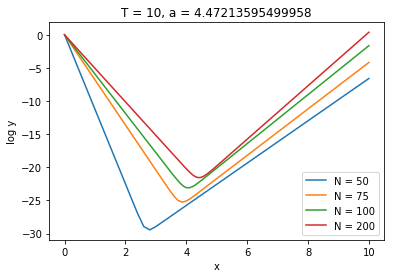

In [169]:
ns = [50, 75, 100, 200]

t, a = get_ts_and_as()

for av in a[1:]:
    for tv in t:
        build_plot(([[i * tv / N for i in range(N + 1)] for N in ns]), 
                   ([np.log(get_solution_euler_method(tv, N, av, (1, -av))) for N in ns]),
                   'x',
                   'log y',
                   'T = {t}, a = {a}'.format(t=tv, a=av),
                    plot_labels=['N = {N}'.format(N=N) for N in ns])

Если счесть, что левые части графиков в точности совпдаюат с прямыми $-ax$ (Порядок примерно такой же, $-\sqrt{20} \cdot 4 \approx -18$), то правая половина совсем плоха.

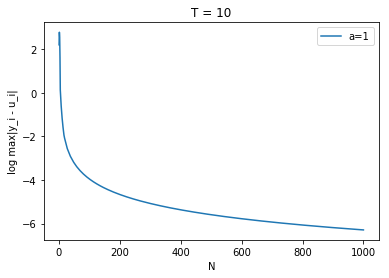

In [177]:
ns = range(1, 1001)

t, a = get_ts_and_as()
a = a[:1]

build_plot(([ns for _ in a]), 
           ([np.log([max(get_solution_euler_method_diff(t[0], N, av, (1, -av))) for N in ns]) for av in a]),
           'N',
           'log max|y_i - u_i|',
           'T = {t}'.format(t=t[0]),
            plot_labels=['a={av}'.format(av=av) for av in a])

Даже при $n = 1000$, наша погрешность все еще больше, чем $10^{-3}$

### 10.4)

In [187]:
def get_solution_runge_kutta_method_diff(T, N, a, ys):
    y_1, y_2 = ys
    h = T / N
    result_ys = [y_1]
    beta = 0.5
    for _ in range(N):
        y_1_new = y_1 + h * (1 - beta) * y_2 + beta * h * (y_2 + h / (2 * beta) * a ** 2 * y_1)
        y_2_new = y_2 + h * (1 - beta) * a ** 2 * y_1 + beta * h * a ** 2 * (y_1 + h / (2 * beta) * y_2)
        y_1, y_2 = y_1_new, y_2_new
        result_ys.append(y_1)
    return [np.abs(y - get_u(a, ind * h)) for ind, y in enumerate(result_ys)]

$\beta = 0.5$ было выбрано, т.к. в презентации было указано как вариант такое значение.

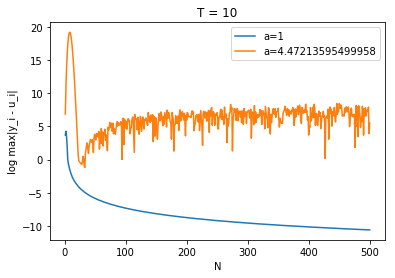

In [188]:
ns = range(1, 501)

t, a = get_ts_and_as()

build_plot(([ns for _ in a]), 
           ([np.log([max(get_solution_runge_kutta_method_diff(t[0], N, av, (1, -av))) for N in ns]) for av in a]),
           'N',
           'log max|y_i - u_i|',
           'T = {t}'.format(t=t[0]),
            plot_labels=['a={av}'.format(av=av) for av in a])

Заметим, что в этом случае мы получили схожую картину (совместный график построим позже), однако точно $\varepsilon = 10^{-3}$ уже достигается при $a = 1$ (но не при $a = \sqrt{20}$).

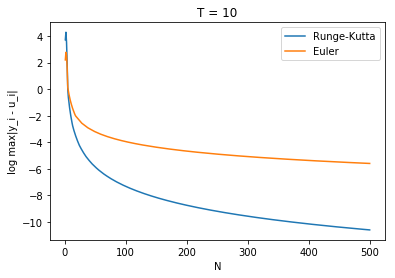

In [198]:
ns = list(range(1, 501))

t, a = get_ts_and_as()
av = a[0]
build_plot([ns, ns], 
           [[np.log(max(get_solution_runge_kutta_method_diff(t[0], N, av, (1, -av)))) for N in ns],
            [np.log(max(get_solution_euler_method_diff(t[0], N, av, (1, -av)))) for N in ns]],
           'N',
           'log max|y_i - u_i|',
           'T = {t}'.format(t=t[0]),
           plot_labels = ['Runge-Kutta', 'Euler'])

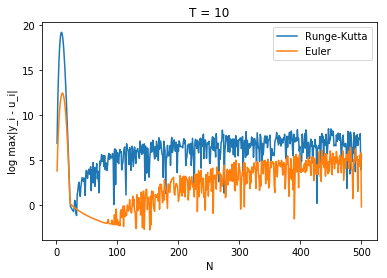

In [199]:
ns = list(range(1, 501))

t, a = get_ts_and_as()
av = a[1]
build_plot([ns, ns], 
           [[np.log(max(get_solution_runge_kutta_method_diff(t[0], N, av, (1, -av)))) for N in ns],
            [np.log(max(get_solution_euler_method_diff(t[0], N, av, (1, -av)))) for N in ns]],
           'N',
           'log max|y_i - u_i|',
           'T = {t}'.format(t=t[0]),
           plot_labels = ['Runge-Kutta', 'Euler'])

Как можно заметить, при $a = 1$ Эйлер хуже, при $a = \sqrt{20}$ все наоборот.

Более того, в первом случае (при $a = 1$), погрешность ведет себя даже лучше, чем обратноэкспоненциальная.

В целом для $a = \sqrt{20}$, оба метода при больших $N$ не дают ничего хорошего. Минимальное по модулю значения погрешности достигается где-то при $N \approx 30$. Почему Эйлер ведет себя чуть лучше? Кажтеся, что все дело просто в количество различных арифметических операций (накапливание погрешности).